In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from astropy.visualization import simple_norm
from astropy.modeling import models
from astropy.convolution import convolve
import photutils
import time
import statmorph
%matplotlib inline

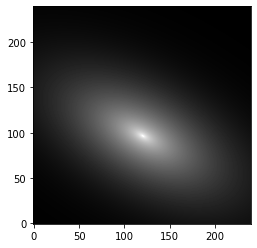

In [2]:
ny, nx = 240, 240
y, x = np.mgrid[0:ny, 0:nx]
sersic_model = models.Sersic2D(
    amplitude=1, r_eff=20, n=2.5, x_0=120.5, y_0=96.5,
    ellip=0.5, theta=-0.5)
image = sersic_model(x, y)
plt.imshow(image, cmap='gray', origin='lower',
           norm=simple_norm(image, stretch='log', log_a=10000))

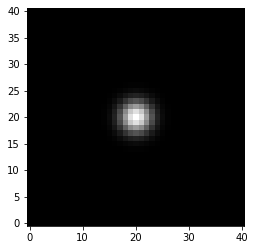

In [3]:
size = 20  # on each side from the center
sigma_psf = 2.0
y, x = np.mgrid[-size:size+1, -size:size+1]
psf = np.exp(-(x**2 + y**2)/(2.0*sigma_psf**2))
psf /= np.sum(psf)
plt.imshow(psf, origin='lower', cmap='gray')

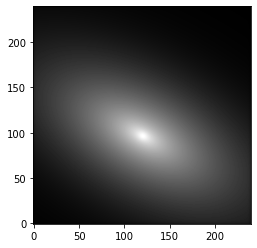

In [4]:
image = convolve(image, psf)
plt.imshow(image, cmap='gray', origin='lower',
           norm=simple_norm(image, stretch='log', log_a=10000))

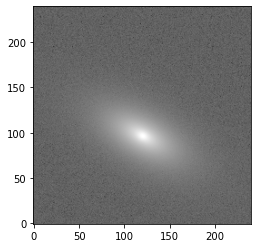

In [5]:
np.random.seed(1)
snp = 100.0
image += (1.0 / snp) * np.random.standard_normal(size=(ny, nx))
plt.imshow(image, cmap='gray', origin='lower',
           norm=simple_norm(image, stretch='log', log_a=10000))

In [7]:
gain = 10000.0

In [ ]:
source_morphs = statmorph.source_morphology(
    image, segmap, gain=gain, psf=psf)